# 12. Data exploration - model (graphs)

In [1]:
sample_features_file <- "../preprocessed_data/sample_features_2019-08-26.feather"
sample_crude_file <- "../preprocessed_data/sample_features_crude_2019-08-26.feather"

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
options(repr.plot.width=4, repr.plot.height=3)

In [4]:
today <- Sys.Date()

## Read data

In [5]:
sample <- feather::read_feather(sample_features_file)
sample_crude <- feather::read_feather(sample_crude_file)
glimpse(sample)

Observations: 1,068
Variables: 61
$ YEAR                  <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,…
$ COMMODITY             <fct> crude, hvl, non-hvl, crude, hvl, non-hvl, crude…
$ OPERATOR_ID           <fct> Enbridge (Group), Enbridge (Group), Enbridge (G…
$ NAME                  <chr> "Enbridge (Group)", "Enbridge (Group)", "Enbrid…
$ MILES                 <dbl> 3201.980, 163.740, 854.440, 263.500, 180.700, 3…
$ AGE_UNKNOWN_MILES     <dbl> 0.000, 0.000, 0.000, 5.500, 0.000, 27.400, 429.…
$ MILES_PRE_1940        <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 84.28, 269.07, 4.…
$ MILES_1940            <dbl> 9.000, 0.000, 0.000, 0.300, 0.000, 182.300, 500…
$ MILES_1950            <dbl> 247.620, 188.820, 133.810, 157.300, 6.900, 1157…
$ MILES_1960            <dbl> 19.750, 0.000, 273.300, 57.000, 32.700, 309.780…
$ MILES_1970            <dbl> 7.390, 0.000, 85.500, 40.100, 81.000, 571.280, …
$ MILES_1980            <dbl> 0.000, 0.000, 1.800, 75.900, 6.800, 130.690, 67…
$ MILES_1990      

## 12.1 Create FE-like variables

Warning message:
“Removed 773 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 773 rows containing missing values (geom_point).”

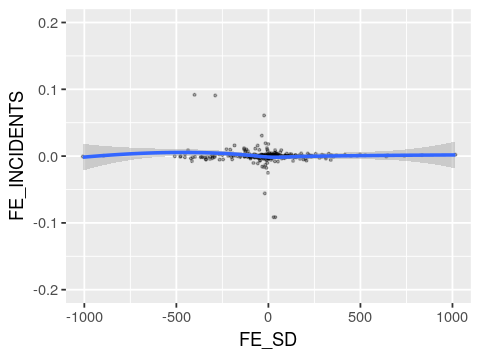

In [6]:
sample %>%
    group_by(YEAR, COMMODITY) %>%
    arrange(desc(YEAR)) %>%
    mutate(FE_INCIDENTS = (sign_inc_3/MILES) - (lead(sign_inc_3)/lead(MILES)), 
           FE_SD = sd_change_3 - lead(sd_change_3)) %>%
    ggplot(aes(x=FE_SD, y=FE_INCIDENTS)) +
        geom_jitter(size=0.5, alpha=0.3) +
        geom_smooth(method='loess') +
        coord_cartesian(ylim=c(-0.2, 0.2), xlim = c(-1000, 1000))

What are the extreme observations?

Warning message:
“Removed 427 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 427 rows containing missing values (geom_point).”

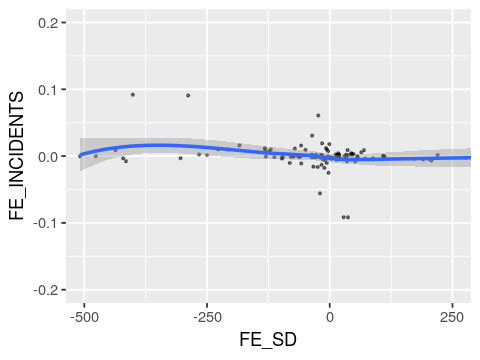

In [7]:
sample_crude %>%
    group_by(YEAR, COMMODITY) %>%
    arrange(desc(YEAR)) %>%
    mutate(FE_INCIDENTS = (sign_inc_3/MILES) - (lead(sign_inc_3)/lead(MILES)), 
           FE_SD = sd_change_3 - lead(sd_change_3)) %>%
    ggplot(aes(x=FE_SD, y=FE_INCIDENTS)) +
        geom_jitter(size=0.5, alpha=0.5) +
        geom_smooth(method='loess') +
        coord_cartesian(ylim=c(-0.2, 0.2), xlim = c(-500, 250))